In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [102]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [103]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [105]:
df.describe() #Identify numerical columns in a dataset

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# **Detailed Interpretation of descriptive statistics**

Using df.describe() we get the statistical description of the dataset. df.describe() method by default selects the numerical columns from the dataset df.
it shows the count, mean, standard deviation, min, 25%, median(50%), 75%, max etc.,..
by seeing the count we get the information about any missing values in the column.
by comparing the mean and 50% value we get an idea about outliers are present.
If mean > median then we can say that the outliers are present in the positive/Right side of the distribution.
If mean < median then we can say that the outliers are present in the Negative/Left side of the distribution.
Also by comparing the 75% and Max value. if there is very much difference in between this values then we can conclude the outliers are present in the column.


In [106]:
df.shape

(450, 13)

In [107]:
df['Date'].mode()

,Date
0,01-04-2021
1,02-04-2021
2,03-04-2021
3,04-04-2021
4,05-04-2021
5,06-04-2021
6,07-04-2021
7,08-04-2021
8,09-04-2021
9,10-04-2021


In [108]:

  df['Day'].value_counts()

,count
Day,
Thursday,90
Friday,60
Saturday,60
Sunday,60
Monday,60
Tuesday,60
Wednesday,60


In [109]:
df['SKU'].mode()

,SKU
0,F01
1,F02
2,F03
3,F04
4,F05
5,F06
6,F07
7,F08
8,F09
9,F10


In [110]:
df['City'].mode()

,City
0,C


In [111]:
df['Volume'].mode()

,Volume
0,3


In [112]:
df['BU'].mode()

,BU
0,FMCG
1,Lifestyle
2,Mobiles


In [113]:
df['Brand'].mode()

,Brand
0,Jeera


In [114]:
df['Model'].mode()

,Model
0,Babaji Cream
1,Babaji Oil
2,Babaji Shampoo
3,Gear BB Cream
4,Gear Cream
5,Gear Oil
6,Gear Shampoo
7,M- Inners
8,M- T Shirts
9,M-Casuals


In [115]:
df['Avg Price'].mode()

,Avg Price
0,400
1,450
2,500
3,1300
4,8100


In [116]:
df['Total Sales Value'].mode()

,Total Sales Value
0,24300


In [117]:
df["Discount Rate (%)"].mode()

,Discount Rate (%)
0,5.007822
1,5.055218
2,5.059801
3,5.072124
4,5.084108
...,...
445,19.940610
446,19.965340
447,19.976879
448,19.982257


In [118]:
df["Discount Amount"].mode()

,Discount Amount
0,69.177942
1,73.025199
2,93.649161
3,94.682735
4,102.705757
...,...
445,17900.983733
446,21153.498820
447,21496.675367
448,25328.224204


In [119]:
df["Net Sales Value"].mode()

,Net Sales Value
0,326.974801
1,330.822058
2,466.350839
3,485.317265
4,496.607104
...,...
445,162603.186379
446,163915.971000
447,163967.080070
448,166263.161348


Before applying the standardscaler on the dataFrame in some columns values are having high magnitude this is not the required format for the model building so we need to standardize this column data to avoid the lack of accuracy

In [120]:
sc=StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols] = sc.fit_transform(df[numeric_cols])

In [121]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,15-04-2021,Thursday,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,15-04-2021,Thursday,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,15-04-2021,Thursday,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


After the standardization of the data we get the values of all the columns in the same scale. it scales down the data in the range of -3 to 3.

-3 to 3 is the range of Standardization.

Each feature will have mean = 0

Each feature will have standard deviation = 1

In [122]:
df=pd.get_dummies(df)
df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
# plt.hist(df['Day'],edgecolor="yellow")


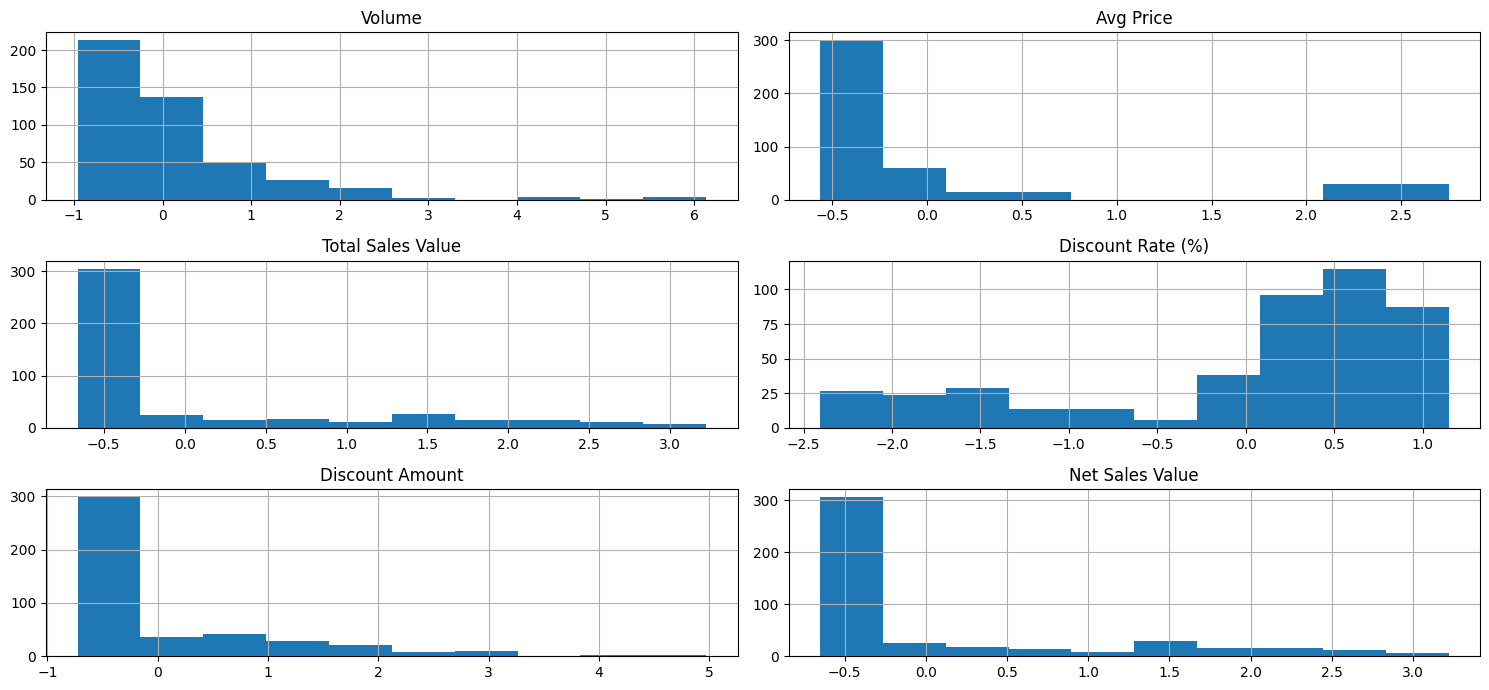

In [125]:
df.hist(figsize=(15,7))
plt.tight_layout()

df.hist() directly plots the histogram of all the numerical columns present in the dataframe df.
histogram givesn us an idea about outliers but we can confirm the presence of an outlier by plotting Boxplot.
Here in dataframe df there are 6 numerical columns are present so the histogram of all the six columns has shown above.
In the 'Volume' column histogram we can see that there is a skewness present in the positive side. so we can say that the outliers are present in the right side.
also same with 'Total sales Value', 'Discount Amount', 'Avg Price' columns.

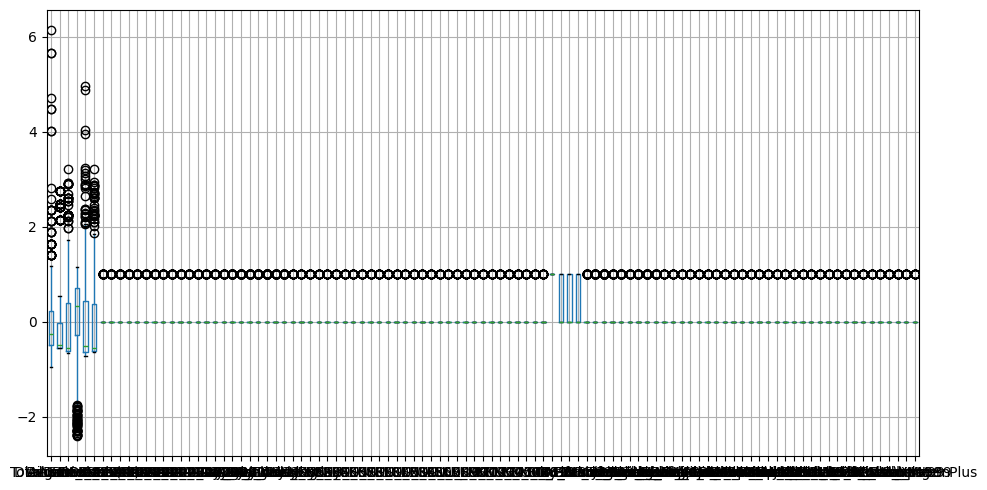

In [126]:
df.boxplot(figsize=(10,5))
plt.tight_layout()

In the above Boxplot we see the in most of the columns the outliers are present above the upper Extreme. so we can treat the outliers by replacing the outliers with its Upper Extreme value and lower extreme value particularly. this is called Capping process.

In [127]:
# plt.bar(df["City"],20)

In [128]:
# df["City"].value_counts()

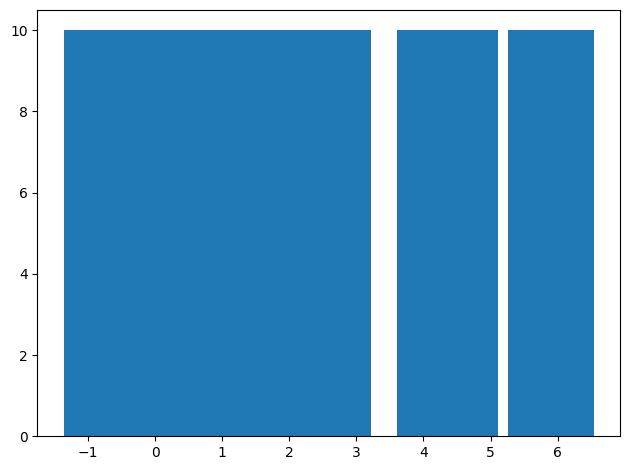

In [129]:
plt.bar(df["Volume"],10)
plt.tight_layout()
# df["volume"].value_counts()

In the above shown plot the bargraph of the 'Volume' column is plotted.
Bargraph can be plotted on categorical columns as well as numerical columns.
It shows the frequency distribution of data
Outliers in categorical column can be found using bargraph
on the x-axis the unique values are presented and on the y-axis the frequency is presented.

In [130]:
df["Volume"].value_counts()

,count
Volume,
-0.488932,110
-0.725512,76
-0.252352,61
0.220808,38
-0.015772,38
0.457388,32
-0.962092,27
1.640289,10
1.403709,9


# **Conclusion**

In this assignment i've uploaded the sales_data_with_discounts.csv dataset. The dataset contains total 450 rows and 13 columns in which some are categorical and some are number etc,.
No null values are present.
Some column values are very large as compared to other column values  so i've done standardization by importing the StandardScaler Class.
Converted the categorical columns to numerical columns using the pandas get_dummies() method.
Also visualized the the dataframe columns using boxplot and Histogram etc,.
Treated the column outliers wherever necessary.

In this assignment i have used StandardScaler class for the standardization. It scales down the data with uniform scaling with all the columns. for the distance based calculations Standardization is required.
Instead of one hot encoding it is easier to use than OHE.

# **Need and Applications of One Hot Encoding**
NEED: For the model building we cannot directly use the Categorical columns so the encoding is required.

Applications:
Logistics Regression , NLP, Decision Tree, Neural Network,